In [117]:
import numpy as np
import re
import HepRead
import HepTools

import os
import matplotlib.pyplot as plt
import pandas as pd
import mplcyberpunk

#import seaborn as sns
#sns.set(style = "darkgrid")


In [45]:
model = 'BLSSM'
work_dir = '/scratch/mjad1g20/HEP/WorkArea/BLSSM_Work'
spheno_dir = '/scratch/mjad1g20/HEP/SPHENO/SPheno-3.3.8'
reference_lhs = '/scratch/mjad1g20/HEP/SPHENO/SPheno-3.3.8/BLSSM/Input_Files/LesHouches.in.BLSSM'
madgraph_dir = '/scratch/mjad1g20/HEP/MG5_aMC_v3_1_1'

In [34]:
param_cards_dir = '/Users/madiaz/WorkArea/BLSSM_model_files/BLSSM_work/HEscan_HB/SPhenoBLSSM_output'

In [44]:
h1 = np.array([])
h2 = np.array([])
cards = np.array([])
hb_result = np.array([])
hb_obsratio = np.array([])
for card in os.listdir(param_cards_dir):
    if 'SPheno.spc.BLSSM_HEscan_' in card:
        pattern =  r'SPheno.spc.BLSSM_HEscan_(?P<number>\d+)'
        file_id = re.match(pattern, card).group('number')
        path_param_card = os.path.join(param_cards_dir,card)
        path_higgsbounds = os.path.join(param_cards_dir, 'HiggsBounds_results_'+file_id+'.dat')
        try:
            slha = HepRead.Slha(path_param_card)
            h1 = np.append(h1,slha.particle(25).mass)
            h2 = np.append(h2,slha.particle(35).mass)
            cards = np.append(cards,card)
            
  
            hb = HepRead.HiggsBoundsResults.read(_, direct_path=path_higgsbounds)
            hb_result = np.append(hb_result,int(hb[0]))
            hb_obsratio = np.append(hb_obsratio,float(hb[2]))


        except:
            print('Error reading files')
            pass
    


In [37]:
path_higgsbounds = os.path.join(param_cards_dir, 'HiggsBounds_results_'+'910'+'.dat')
hb = HepRead.HiggsBoundsResults.read(_,direct_path=path_higgsbounds)
hb



('0', '1957', '2.37415', '1')

In [45]:
df = pd.DataFrame(dict(mh1 = h1, mh2 = h2, card_number=cards, hb_result=hb_result, hb_obsratio=hb_obsratio))
df.head()

,mh1,mh2,card_number,hb_result,hb_obsratio
0,117.805294,148.799347,SPheno.spc.BLSSM_HEscan_910,0.0,2.37415
1,120.603629,192.768614,SPheno.spc.BLSSM_HEscan_1384,0.0,1.14551
2,93.073780,127.312672,SPheno.spc.BLSSM_HEscan_577,1.0,0.82268
3,119.887230,183.476397,SPheno.spc.BLSSM_HEscan_319,0.0,1.72973
4,119.007413,156.844750,SPheno.spc.BLSSM_HEscan_22,0.0,1.40690


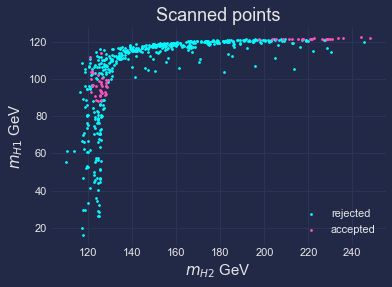

In [136]:
plt.style.use("cyberpunk")

plt.scatter(df.mh2[df.hb_result == 0], df.mh1[df.hb_result == 0],s=3,label = 'rejected')
plt.scatter(df.mh2[df.hb_result == 1], df.mh1[df.hb_result == 1],s=3, label = 'accepted')
plt.ylabel(r'$m_{H1}$ GeV',fontsize=15)
plt.xlabel(r'$m_{H2}$ GeV',fontsize=15)
plt.title('Scanned points',fontsize=18)
plt.legend()
plt.show()

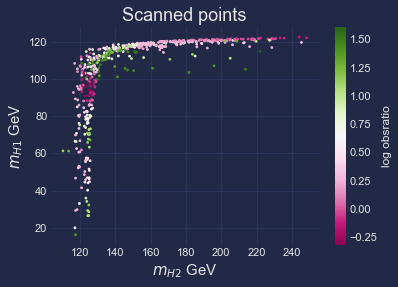

In [160]:
plt.style.use("cyberpunk")

df2 = df[df.hb_obsratio < 5]
plt.scatter(df2.mh2, df2.mh1,c=np.log(df2.hb_obsratio),s=3,cmap='PiYG')

plt.ylabel(r'$m_{H1}$ GeV',fontsize=15)
plt.xlabel(r'$m_{H2}$ GeV',fontsize=15)
plt.title('Scanned points',fontsize=18)
plt.colorbar(label=r'log obsratio')
plt.show()

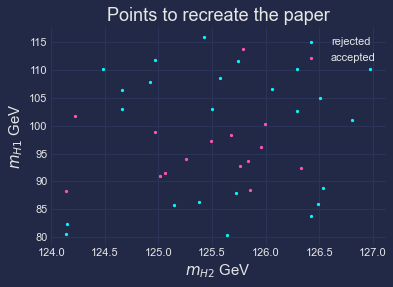

In [166]:
df_select= df[(124 < df.mh2) & (df.mh2 < 127) & (80<df.mh1) ]

plt.style.use("cyberpunk")

plt.scatter(df_select.mh2[df.hb_result == 0], df_select.mh1[df.hb_result == 0],s=5,label = 'rejected')
plt.scatter(df_select.mh2[df.hb_result == 1], df_select.mh1[df.hb_result == 1],s=5, label = 'accepted')
plt.ylabel(r'$m_{H1}$ GeV',fontsize=15)
plt.xlabel(r'$m_{H2}$ GeV',fontsize=15)
plt.title('Points to recreate the paper',fontsize=18)
plt.legend()

plt.show()

In [ ]:
selected_param_card = df.iloc[239].card_number
print('Param card : {}'.format(selected_param_card))
os.path.join(param_cards_dir,selected_param_card)

Param card : SPheno.spc.BLSSM_HEscan_770


'/Users/madiaz/WorkArea/BLSSM_model_files/BLSSM_work/HEscan_2/SPhenoBLSSM_output/SPheno.spc.BLSSM_HEscan_770'

# Events
### $\{h1,h2\} \rightarrow \gamma \gamma$

In [ ]:
from pathlib import Path
import uproot
import awkward as ak
plt.style.use("cyberpunk")

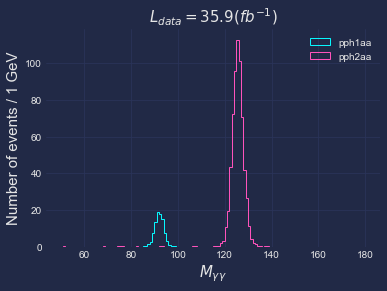

In [ ]:
root_files_dir = '/Users/madiaz/WorkArea/BLSSM_model_files/BLSSM_work/HEscan_2'
processes = ['ppaa_bg', 'pph1aa', 'pph2aa']

for p in processes[1:]:
    root_file = Path(root_files_dir).joinpath(p).joinpath('tag_1_delphes_events.root')


    file = uproot.open(root_file)
    photons = file['Delphes']['Photon']

    select=ak.num(photons['Photon.PT'].array())==2

    a_PT = photons['Photon.PT'].array()[select]
    a_Phi = photons['Photon.Phi'].array()[select]
    a_Eta = photons['Photon.Eta'].array()[select]
    a_E = photons['Photon.E'].array()[select]

    a_px = a_PT*np.cos(a_Phi)
    a_py = a_PT*np.sin(a_Phi)
    a_pz = a_PT*np.sinh(a_Eta)

    imass_diph = np.sqrt(ak.sum(a_E,axis=1)**2-ak.sum(a_px,axis=1)**2-ak.sum(a_py,axis=1)**2-ak.sum(a_pz,axis=1)**2).to_numpy()

  

    cross_sections = file['Delphes;1']['Event.CrossSection'].array()
    n_events_total = len(file['Delphes;1']['Event.CrossSection'].array())
    cross_sections = cross_sections[select]
    n_events = np.ones(len(cross_sections))*n_events_total
    L_mc = n_events*(cross_sections**-1)
    L_data = 35.9
    weights=  (L_data*L_mc**-1)*10**3

    w1 = 1
    n1 = int((180 - 50)/w1)


    plt.hist(   imass_diph,bins=n1, range=(50, 180), density=False,
                linewidth=1, histtype='step', label=p, weights=weights)

    plt.legend()

plt.xlabel(r'$M_{\gamma\gamma}$',fontsize=15)
plt.ylabel('Number of events / {} GeV'.format(w1),fontsize=15)
plt.title(r'$L_{data}=35.9 (fb^{-1})$',fontsize=15)
#plt.title('Weights from Events in root file')
plt.show()


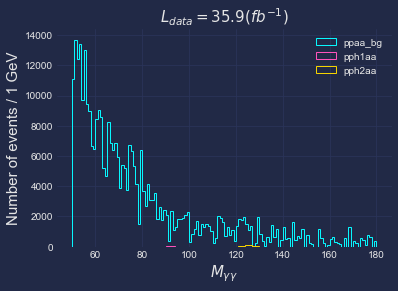

In [ ]:
root_files_dir = '/Users/madiaz/WorkArea/BLSSM_model_files/BLSSM_work/HEscan_2'
processes = ['ppaa_bg', 'pph1aa', 'pph2aa']

for p in processes:
    root_file = Path(root_files_dir).joinpath(p).joinpath('tag_1_delphes_events.root')


    file = uproot.open(root_file)
    photons = file['Delphes']['Photon']

    select=ak.num(photons['Photon.PT'].array())==2

    a_PT = photons['Photon.PT'].array()[select]
    a_Phi = photons['Photon.Phi'].array()[select]
    a_Eta = photons['Photon.Eta'].array()[select]
    a_E = photons['Photon.E'].array()[select]

    a_px = a_PT*np.cos(a_Phi)
    a_py = a_PT*np.sin(a_Phi)
    a_pz = a_PT*np.sinh(a_Eta)

    imass_diph = np.sqrt(ak.sum(a_E,axis=1)**2-ak.sum(a_px,axis=1)**2-ak.sum(a_py,axis=1)**2-ak.sum(a_pz,axis=1)**2).to_numpy()

  

    cross_sections = file['Delphes;1']['Event.CrossSection'].array()
    n_events_total = len(file['Delphes;1']['Event.CrossSection'].array())
    cross_sections = cross_sections[select]
    n_events = np.ones(len(cross_sections))*n_events_total
    L_mc = n_events*(cross_sections**-1)
    L_data = 35.9
    weights=  (L_data*L_mc**-1)*10**3

    w1 = 1
    n1 = int((180 - 50)/w1)


    plt.hist(   imass_diph,bins=n1, range=(50, 180), density=False,
                linewidth=1, histtype='step', label=p, weights=weights)

    plt.legend()

plt.xlabel(r'$M_{\gamma\gamma}$',fontsize=15)
plt.ylabel('Number of events / {} GeV'.format(w1),fontsize=15)
plt.title(r'$L_{data}=35.9 (fb^{-1})$',fontsize=15)
#plt.title('Weights from Events in root file')
plt.show()